In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.data.shape

(150, 4)

In [3]:
n_samples, n_features = iris.data.shape

In [4]:
len(iris.target) == n_samples

True

In [5]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [6]:
X, y = iris.data, iris.target

In [7]:
# Supervised Learning
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [8]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
clf = clf.fit(X, y)

In [10]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [11]:
X_new = [[ 5.0,  3.6,  1.3,  0.25]]
clf.predict(X_new)

array([0])

In [12]:
X[-1:]

array([[ 5.9,  3. ,  5.1,  1.8]])

In [13]:
clf.predict([[ 5.7,  3.1 ,  5.3,  1.6]])

array([2])

In [14]:
print clf.predict(X_new)
clf.predict_proba(X_new)

[0]


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf2 = LogisticRegression().fit(X, y)
print clf2.predict(X_new)
print clf2.predict_proba(X_new)

[0]
[[  9.07512928e-01   9.24770379e-02   1.00343962e-05]]


In [27]:
# Unsupervised Learning

In [28]:
#Dimensionality Reduction and visualization

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

In [18]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [19]:
X_pca = pca.transform(X)

In [20]:
X[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [21]:
X_pca[0:5]

array([[-1.31027769,  0.665813  ],
       [-1.32549971, -0.34565409],
       [-1.41064601, -0.27998911],
       [-1.34065489, -0.63424977],
       [-1.33194435,  0.68072975]])

In [22]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([-0., -0.])

In [23]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

In [25]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
     colors = cycle('rgbcmykw')
     target_ids = range(len(target_names))
     pl.figure()
     for i, c, label in zip(target_ids, colors, target_names):
         pl.scatter(data[target == i, 0], data[target == i, 1],
                    c=c, label=label)
     pl.legend()
     pl.show()

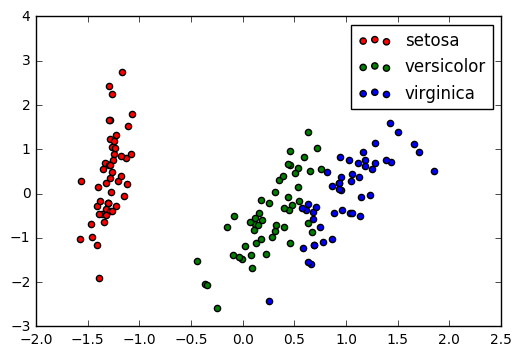

In [26]:
plot_2D(X_pca, iris.target, iris.target_names)

In [29]:
#Clustering

In [31]:
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [32]:
rng = RandomState(42)
kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [33]:
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02,  0.71],
       [ 0.33, -0.89],
       [-1.29,  0.44]])

In [34]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [35]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

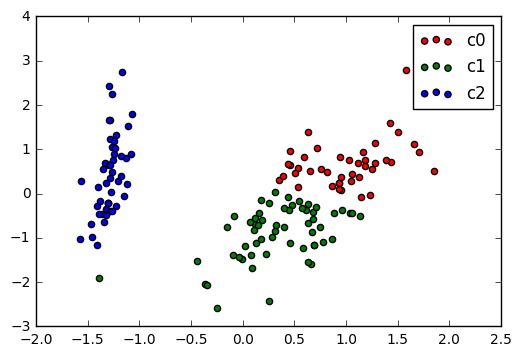

In [36]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

In [37]:
rng = RandomState(42)
kmeansX = KMeans(n_clusters=3, random_state=rng).fit(X)

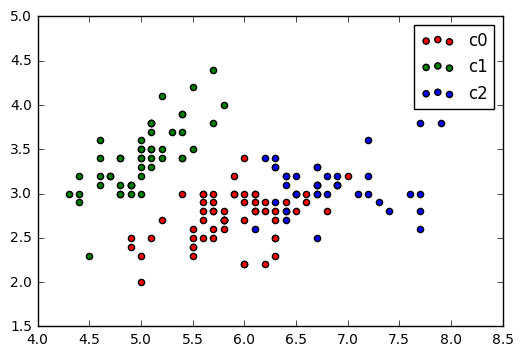

In [38]:
plot_2D(X, kmeansX.labels_, ["c0", "c1", "c2"])

In [39]:
n_samples

150

In [40]:
indices = np.arange(n_samples)indices[:10]

In [41]:
indices[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
RandomState(42).shuffle(indices)

In [43]:
indices[:10]

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82])

In [44]:
X = iris.data[indices]
y = iris.target[indices]

In [45]:
split = (n_samples * 2) / 3

In [46]:
X_train, X_test = X[:split], X[split:]

In [47]:
y_train, y_test = y[:split], y[split:]

In [48]:
X_train.shape

(100, 4)

In [49]:
X_test.shape

(50, 4)

In [50]:
clf = LinearSVC().fit(X_train, y_train)

In [51]:
np.mean(clf.predict(X_test) == y_test)

1.0